### Instalação

In [ ]:
pip install pandas matplotlib googletrans==4.0.0-rc1 nltk vaderSentiment wordcloud

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from googletrans import Translator
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#Função para importar os CSVs
# Links dos arquivos CSV
links = [
    'https://drive.google.com/file/d/1MYKTzzTgqVrW7vRkjxfdh0jycu09HOCi/view?usp=drive_link',
    'https://drive.google.com/file/d/1pHn1UM6Vr7Npc29G2zYPbyZhga282cPm/view?usp=drive_link',
    'https://drive.google.com/file/d/1ydWQXuZ-X7CuTAmIAIXZXq58T9qpHsIw/view?usp=drive_link',
    'https://drive.google.com/file/d/1iM9GXdySdZGpaahOSnwzaa5sdLPqFiZI/view?usp=drive_link'
]

df_presentes_before = None
df_presentes_after = None
df_publicas_after = None
df_publicas_before = None

for i, link in enumerate(links):
    file_id = link.split('/')[-2]
    download_link = f"https://drive.google.com/uc?id={file_id}"
    df = pd.read_csv(download_link)

    if i == 0:
        df_presentes_before = df
        df_presentes_before['Post Created Date'] = pd.to_datetime(df_presentes_before['Post Created Date'])
    elif i == 1:
        df_presentes_after = df
        df_presentes_after['Post Created Date'] = pd.to_datetime(df_presentes_after['Post Created Date'])
    elif i == 2:
        df_publicas_after = df
        df_publicas_after['Post Created Date'] = pd.to_datetime(df_publicas_after['Post Created Date'])
    elif i == 3:
        df_publicas_before = df
        df_publicas_before['Post Created Date'] = pd.to_datetime(df_publicas_before['Post Created Date'])

# Checando se está funcionando
print("df_presentes_before:")
print(df_presentes_before.head())
print('\n')

print("df_presentes_after:")
print(df_presentes_after.head())
print('\n')

print("df_publicas_after:")
print(df_publicas_after.head())
print('\n')

print("df_publicas_before:")
print(df_publicas_before.head())
print('\n')

df_presentes_before:
   Unnamed: 0              Account             User Name  \
0           0    Flávio Bolsonaro       flaviobolsonaro   
1           1         Bolsonaro TV          bolsonaro.tv   
2           2    Jair M. Bolsonaro  jairmessiasbolsonaro   
3           3  Silvia Nobre Waiãpi          silviawaiapi   
4           4       Adrilles Jorge         adrillesjorge   

   Followers at Posting             Post Created Post Created Date  \
0             4403314.0  2023-01-08 20:40:54 EST        2023-01-08   
1             1015777.0  2023-01-08 19:28:17 EST        2023-01-08   
2            25559864.0  2023-01-08 19:22:44 EST        2023-01-08   
3              140364.0  2023-01-08 17:43:19 EST        2023-01-08   
4              868459.0  2023-01-08 15:45:12 EST        2023-01-08   

  Post Created Time   Type Total Interactions    Likes  ...  Title  \
0          20:40:54  Photo            101,266    97622  ...    NaN   
1          19:28:17  Photo             65,941    62669  .

In [ ]:
  # Inicializar o analisador de sentimentos do VADER
  sia = SentimentIntensityAnalyzer()

  # Inicializar o tradutor
  translator = Translator()

### Funções

In [ ]:
def plot_result_sentimentos_por_dia(df):
  # Plotar os resultados da análise temporal dos sentimentos por dia
  plt.figure(figsize=(12, 6))

  # Agrupar os sentimentos médios por dia
  daily_sentiments_description = df.groupby(df['Post Created Date'].dt.date)['Description_Sentiment'].mean()
  daily_sentiments_image_text = df.groupby(df['Post Created Date'].dt.date)['Image_Text_Sentiment'].mean()

  # Plotar o gráfico de linha para os campos de descrição
  plt.subplot(1, 2, 1)
  daily_sentiments_description.plot(kind='line', marker='o')
  plt.xlabel('Data')
  plt.ylabel('Sentimento Médio')
  plt.title('Análise Temporal dos Sentimentos - Descrição')

  # Plotar o gráfico de linha para os campos de texto da imagem
  plt.subplot(1, 2, 2)
  daily_sentiments_image_text.plot(kind='line', marker='o')
  plt.xlabel('Data')
  plt.ylabel('Sentimento Médio')
  plt.title('Análise Temporal dos Sentimentos - Texto da Imagem')

  plt.tight_layout()
  plt.show()

In [ ]:
def plot_result_sentimentos_por_mes(df):
  # Plotar os resultados da análise temporal dos sentimentos
  plt.figure(figsize=(12, 6))

  # Agrupar os sentimentos médios por mês
  monthly_sentiments_description = df.groupby(df['Post Created Date'].dt.to_period('M'))['Description_Sentiment'].mean()
  monthly_sentiments_image_text = df.groupby(df['Post Created Date'].dt.to_period('M'))['Image_Text_Sentiment'].mean()

  # Plotar o gráfico de linha para os campos de descrição
  plt.subplot(1, 2, 1)
  monthly_sentiments_description.plot(kind='line', marker='o')
  plt.xlabel('Mês')
  plt.ylabel('Sentimento Médio')
  plt.title('Análise Temporal dos Sentimentos - Descrição')

  # Plotar o gráfico de linha para os campos de texto da imagem
  plt.subplot(1, 2, 2)
  monthly_sentiments_image_text.plot(kind='line', marker='o')
  plt.xlabel('Mês')
  plt.ylabel('Sentimento Médio')
  plt.title('Análise Temporal dos Sentimentos - Texto da Imagem')

  plt.tight_layout()
  plt.show()

In [ ]:
def analise_sentimento_por_pessoa(df):
  # Inicializar o analisador de sentimentos do VADER
  sia = SentimentIntensityAnalyzer()

  # Inicializar o tradutor
  translator = Translator()

  # Função para traduzir o texto para o idioma inglês
  def translate_text(text):
      try:
          translation = translator.translate(text, dest='en', src='pt')
          return translation.text
      except:
          return ""

  # Realizar a tradução e análise de sentimentos nos campos de descrição
  df['Description_Translated'] = df['Description'].apply(translate_text)
  df['Description_Sentiment'] = df['Description_Translated'].apply(lambda x: sia.polarity_scores(x)['compound'])

  # Realizar a tradução e análise de sentimentos nos campos de texto da imagem
  df['Image_Text_Translated'] = df['Image Text'].apply(translate_text)
  df['Image_Text_Sentiment'] = df['Image_Text_Translated'].apply(lambda x: sia.polarity_scores(x)['compound'])
  return df

In [ ]:
def plot_hashtags_top_10(df):
  # Extrair as hashtags dos campos de descrição e texto da imagem
  description_hashtags = df['Description'].str.findall(r'#(\w+)').explode().value_counts().head(10)
  image_text_hashtags = df['Image Text'].str.findall(r'#(\w+)').explode().value_counts().head(10)

  # Plotar as 10 hashtags mais usadas nos campos de descrição
  plt.figure(figsize=(10, 5))
  plt.bar(description_hashtags.index, description_hashtags.values)
  plt.xlabel('Hashtags')
  plt.ylabel('Frequência')
  plt.title('Top 10 Hashtags nos Campos de Descrição')
  plt.xticks(rotation=45)
  plt.show()

  # Plotar as 10 hashtags mais usadas nos campos de texto da imagem
  plt.figure(figsize=(10, 5))
  plt.bar(image_text_hashtags.index, image_text_hashtags.values)
  plt.xlabel('Hashtags')
  plt.ylabel('Frequência')
  plt.title('Top 10 Hashtags nos Campos de Texto da Imagem')
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
def wordcloud_mention(df):
  # Extrair os @'s referenciados nas postagens
  user_mentions = df['Description'].str.findall(r'@(\w+)').explode().value_counts().head(50)

  # Criar a nuvem de referências com os @'s
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(user_mentions)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('Nuvem de Referências com @\'s')
  plt.show()


In [ ]:
def analise_words(df):
  # Extrair as palavras dos campos de descrição e texto da imagem
  description_words = ' '.join(df['Description'].dropna())
  image_text_words = ' '.join(df['Image Text'].dropna())
  # Tokenizar as palavras
  description_tokens = word_tokenize(description_words)
  image_text_tokens = word_tokenize(image_text_words)
  # Definir as stopwords (palavras a serem ignoradas)
  stopwords = set(nltk.corpus.stopwords.words('portuguese'))
  # Filtrar as stopwords das palavras
  description_filtered_words = [word.lower() for word in description_tokens if word.lower() not in stopwords]
  image_text_filtered_words = [word.lower() for word in image_text_tokens if word.lower() not in stopwords]
  # Juntar as palavras filtradas em uma única string
  description_filtered_text = ' '.join(description_filtered_words)
  image_text_filtered_text = ' '.join(image_text_filtered_words)
  # Criar a nuvem de palavras com as palavras filtradas
  wordcloud_description = WordCloud(width=800, height=400, background_color='white').generate(description_filtered_text)
  wordcloud_image_text = WordCloud(width=800, height=400, background_color='white').generate(image_text_filtered_text)
  # Plotar a nuvem de palavras dos campos de descrição
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud_description, interpolation='bilinear')
  plt.axis('off')
  plt.title('Nuvem de Palavras - Descrição')
  plt.show()

  # Plotar a nuvem de palavras dos campos de texto da imagem
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud_image_text, interpolation='bilinear')
  plt.axis('off')
  plt.title('Nuvem de Palavras - Texto da Imagem')
  plt.show()



In [ ]:
def analise_media_posts_per_person(df):
  # Converter a coluna 'Post Created Date' para o formato de data
  df['Post Created Date'] = pd.to_datetime(df['Post Created Date'])

  # Definir os limites dos períodos de dias
  start_date = min(df['Post Created Date'])
  end_date = max(df['Post Created Date'])
  num_periods = 4
  # Calcular a duração de cada período
  period_duration = (end_date - start_date) / num_periods

  # Definir os rótulos dos períodos com as datas de início e fim
  period_labels = [f'{(start_date + i * period_duration).strftime("%Y-%m-%d")} to {(start_date + (i+1) * period_duration).strftime("%Y-%m-%d")}' for i in range(num_periods)]

  # Agrupar os dados por períodos de dias e 'User Name', calcular a média de postagens por pessoa
  df['Period'] = pd.cut(df['Post Created Date'], bins=pd.date_range(start_date, end_date, periods=num_periods+1),
                        labels=period_labels, right=False)
  average_posts_per_person = df.groupby(['Period', 'User Name']).size().groupby('Period').mean()

  # Plotar o gráfico de barras da média de postagens por pessoa por período
  plt.figure(figsize=(10, 5))
  ax = average_posts_per_person.plot(kind='bar', color='skyblue')
  plt.xlabel('Período')
  plt.ylabel('Média de Postagens por Pessoa')
  plt.title('Análise da Média de Postagens por Pessoa por Período')

  # Adicionar os valores acima das barras
  for i in ax.patches:
      ax.text(i.get_x() + i.get_width() / 2, i.get_height(), round(i.get_height(), 2), ha='center', va='bottom')

  # Exibir as legendas com os dias de início e fim de cada período na vertical
  plt.xticks(rotation='horizontal')
  plt.xticks(range(num_periods), period_labels)

  plt.tight_layout()
  plt.show()

In [ ]:
def analise_num_posts(df):
  # Converter a coluna 'Post Created Date' para o formato de data
  df['Post Created Date'] = pd.to_datetime(df['Post Created Date'])

  # Definir os limites dos períodos de dias
  start_date = min(df['Post Created Date'])
  end_date = max(df['Post Created Date'])
  num_periods = 4

  # Calcular a duração de cada período
  period_duration = (end_date - start_date) / num_periods

  # Definir os rótulos dos períodos com as datas de início e fim
  period_labels = [f'{(start_date + i * period_duration).strftime("%Y-%m-%d")}\n para \n{(start_date + (i+1) * period_duration).strftime("%Y-%m-%d")}' for i in range(num_periods)]

  # Agrupar os dados por períodos de dias
  df['Period'] = pd.cut(df['Post Created Date'], bins=pd.date_range(start_date, end_date, periods=num_periods+1),
                        labels=period_labels, right=False)

  # Contar o número de postagens por período
  period_post_counts = df['Period'].value_counts().sort_index()

  # Plotar o gráfico de barras dos números de postagens por período
  plt.figure(figsize=(10, 5))
  ax = period_post_counts.plot(kind='bar', color='skyblue')
  plt.xlabel('Período')
  plt.ylabel('Número de Postagens')
  plt.title('Análise do Número de Postagens por Período')

  # Adicionar os valores acima das barras
  for i in ax.patches:
      ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

  # Exibir as legendas com os dias de início e fim de cada período na vertical
  plt.xticks(rotation='horizontal')
  plt.xticks(range(num_periods), period_labels)

  plt.tight_layout()
  plt.show()

In [ ]:
def sentimento_por_pessoa(df):

  # Agrupar os posts por pessoa e mês e calcular a média do sentimento
  df_grouped = df.groupby([df['User Name'], df['Post Created Date'].dt.month])['Description_Sentiment'].mean().reset_index()

  # Separar os posts em positivos e negativos com base na média do sentimento
  df_positive = df_grouped[df_grouped['Description_Sentiment'] > 0]
  df_negative = df_grouped[df_grouped['Description_Sentiment'] < 0]

  # Contar o número de posts positivos e negativos por pessoa
  positive_counts = df_positive.groupby('User Name').size()
  negative_counts = df_negative.groupby('User Name').size()

  # Criar um gráfico de barras para mostrar a divisão dos sentimentos
  plt.figure(figsize=(12, 6))
  plt.bar(positive_counts.index, positive_counts, color='green', label='Positivo')
  plt.bar(negative_counts.index, negative_counts, color='red', label='Negativo')
  plt.xlabel('Usuário')
  plt.ylabel('Número de Posts')
  plt.title('Divisão dos Sentimentos nos Posts por Pessoa')
  plt.legend()
  plt.xticks(rotation=90)
  plt.show()

## Função de exportar para Gephi, se for do interesse

In [ ]:
from google.colab import files

# Extrair as menções do campo 'Description' e criar a coluna 'Mentions'
df['Mentions'] = df['Description'].apply(lambda x: re.findall(r'@(\w+)', x) if isinstance(x, str) else [])

# Criar um novo DataFrame com as colunas 'Source', 'Target' e 'Label' para o Gephi
df_gephi = df.explode('Mentions').rename(columns={'User Name': 'Source', 'Mentions': 'Target'})[['Source', 'Target']]

# Remover as linhas com valores ausentes
df_gephi = df_gephi.dropna()

# Adicionar a coluna 'Label' para fornecer rótulos aos nós no Gephi
df_gephi['Label'] = df_gephi['Source']

# Salvar o DataFrame no arquivo CSV para importar no Gephi
df_gephi.to_csv('seu_arquivo_gephi.csv', index=False)


files.download('seu_arquivo_gephi.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Análise do dia 30/10 até dia 09/01 - Figuras públicas



### Definição da base

In [ ]:
df_publicas_before = pd.read_csv('df_publicas_before.csv')
df_publicas_before['Post Created Date'] = pd.to_datetime(df_publicas_before['Post Created Date'])


### Análise de Sentimentos

#### Resultados

##### Resultados diários

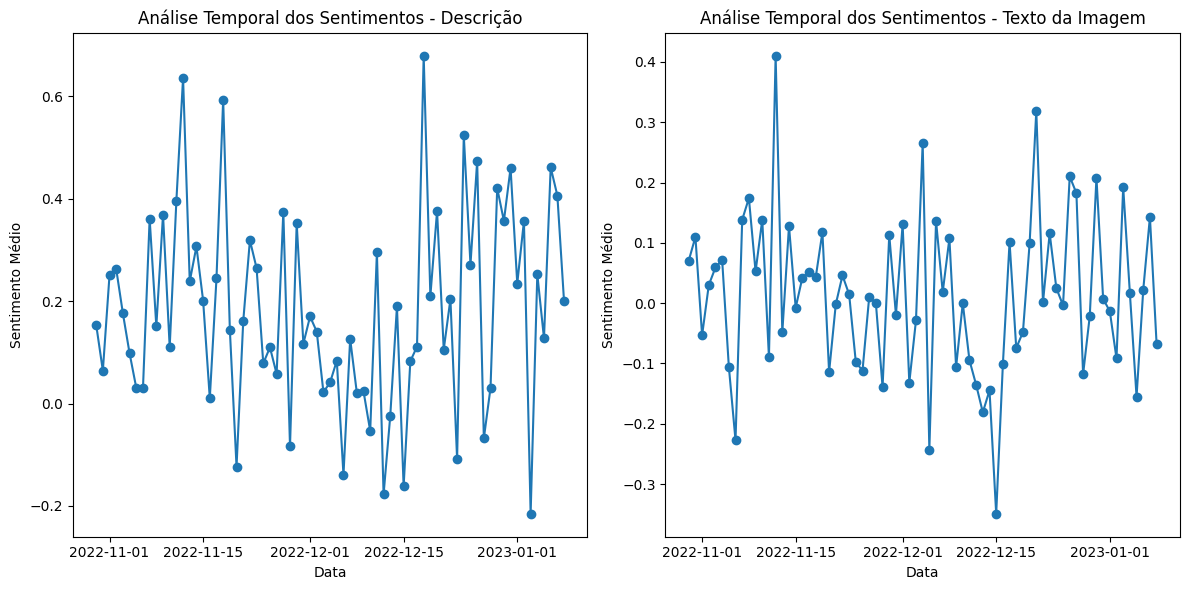

In [ ]:
plot_result_sentimentos_por_dia(df_publicas_before)

##### Resultados mensais

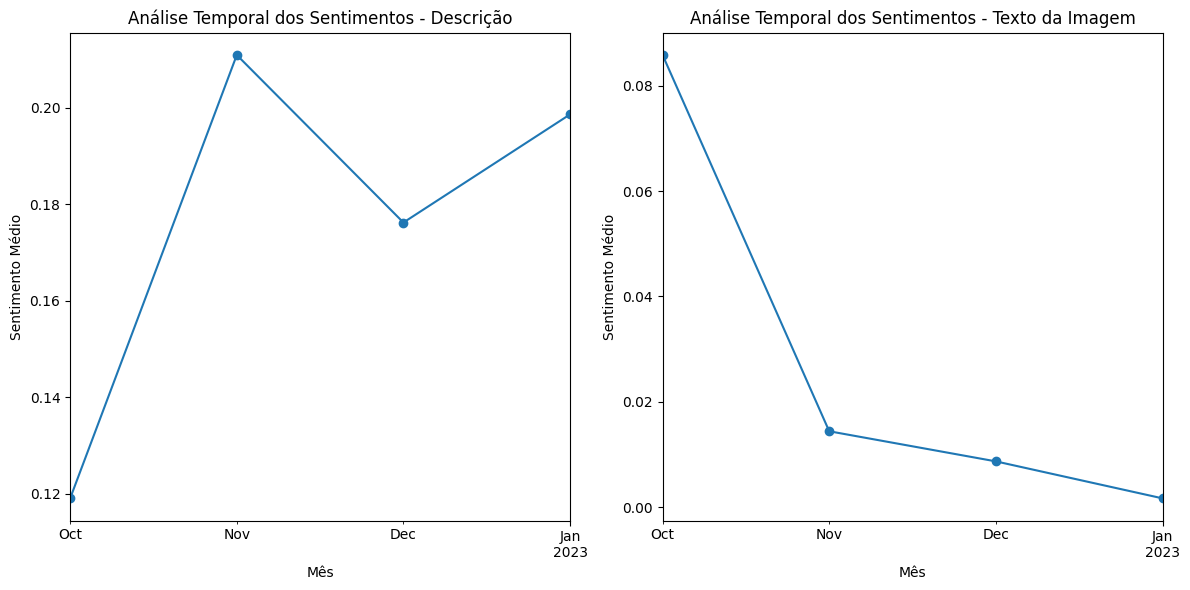

In [ ]:
plot_result_sentimentos_por_mes(df_publicas_before)


##### Resultado sentimento por pessoas

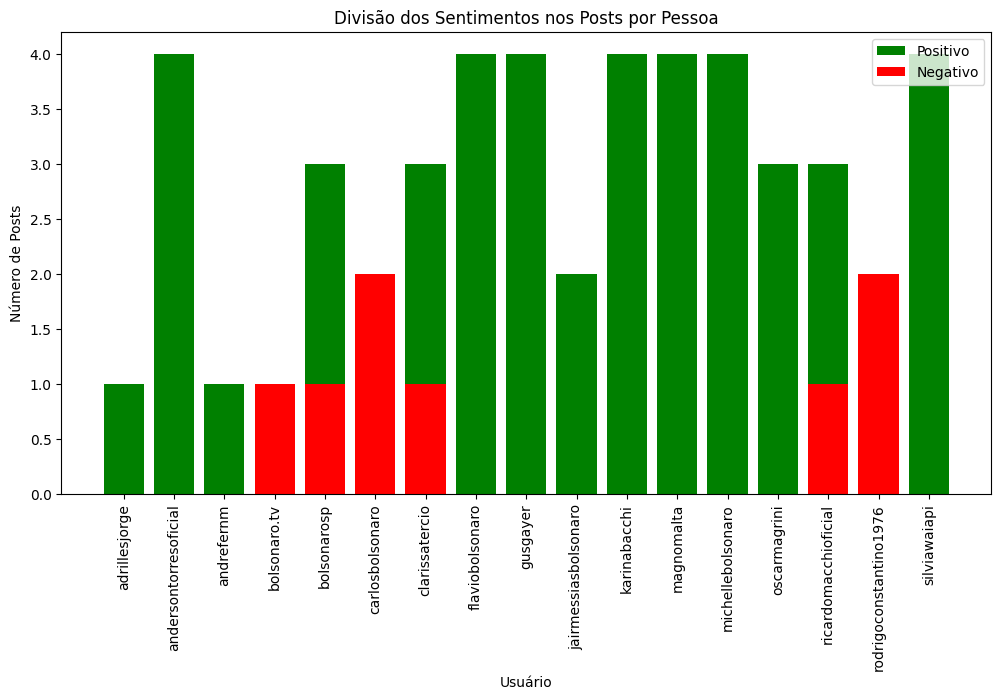

In [ ]:
sentimento_por_pessoa(df_publicas_before)


### Hashtags mais usadas

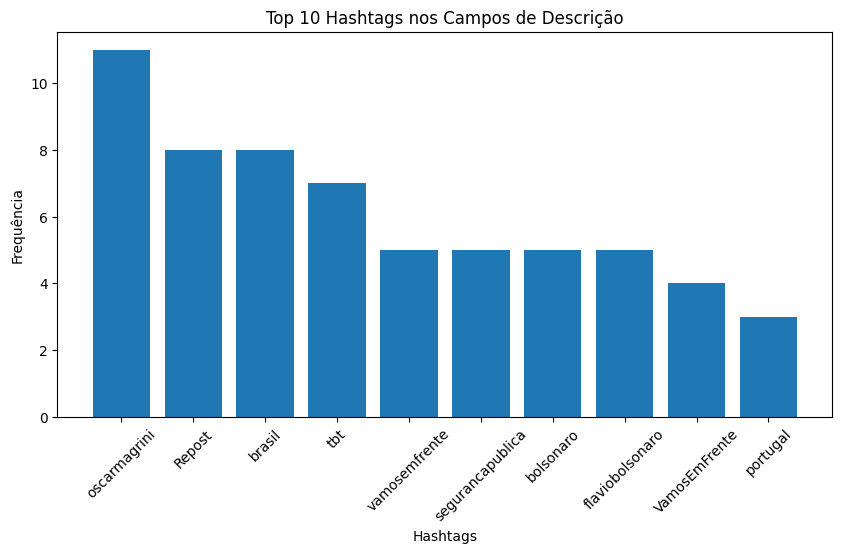

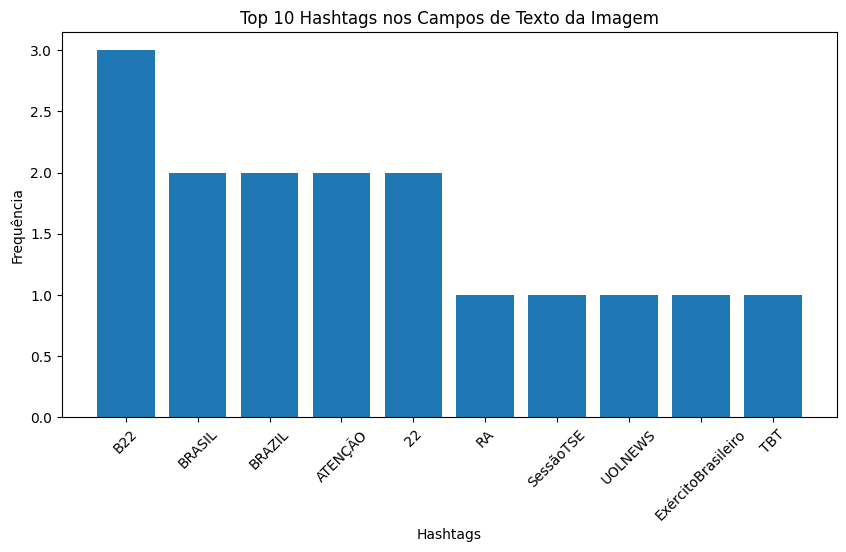

In [ ]:
plot_hashtags_top_10(df_publicas_before)

### Nuvem de palavras com as menções

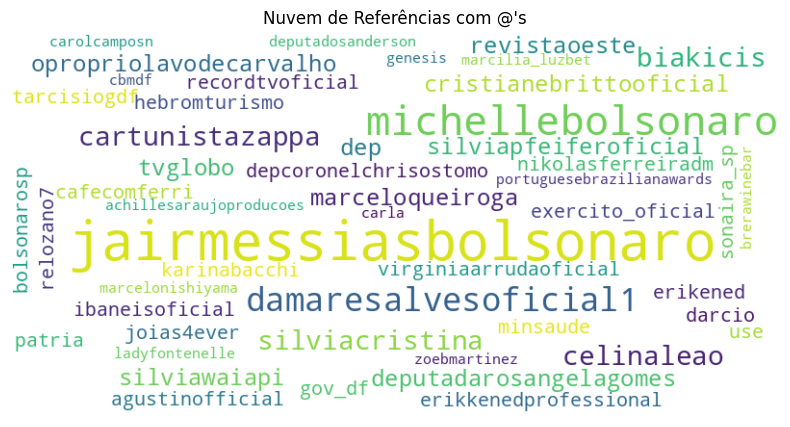

In [ ]:
wordcloud_mention(df_publicas_before)

### Análise de palavras

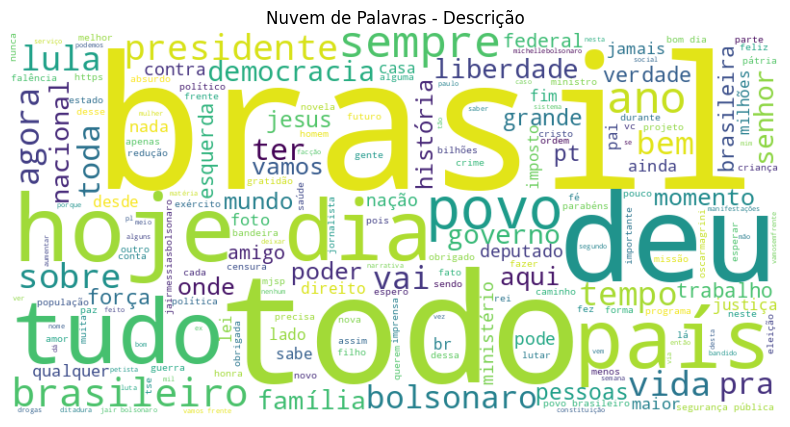

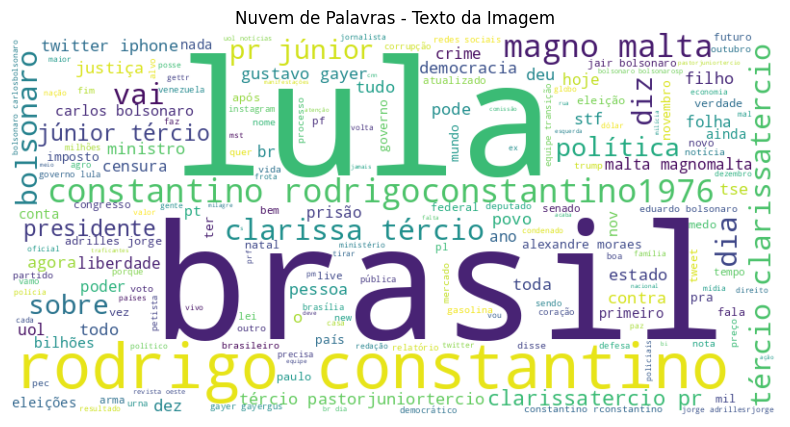

In [ ]:
analise_words(df_publicas_before)

### Análise de número de postagens

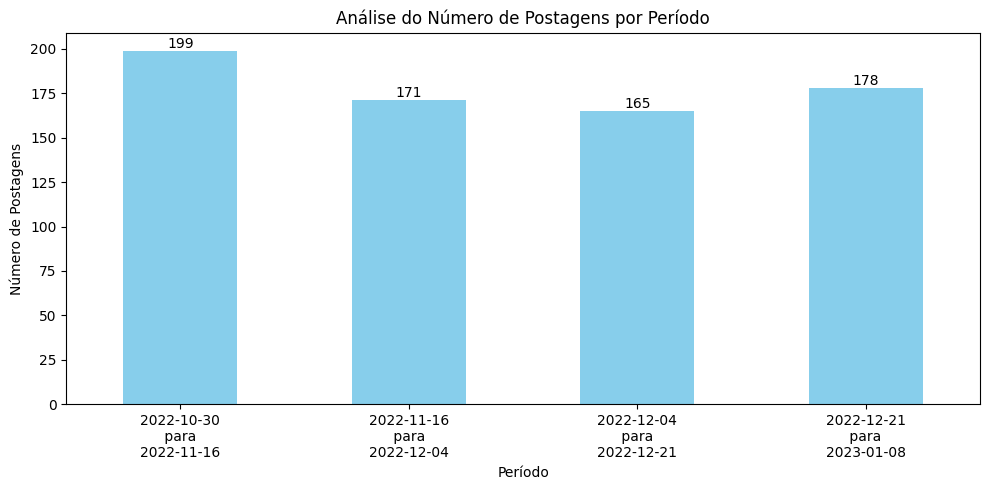

In [ ]:
analise_num_posts(df_publicas_before)

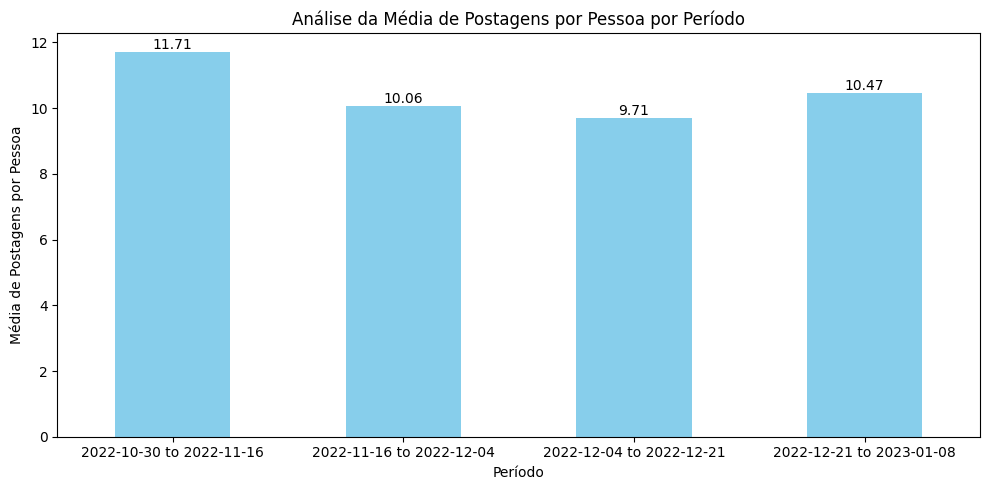

In [ ]:
analise_media_posts_per_person(df_publicas_before)

# Análise do dia 09/01 até dia 10/04 - Figuras públicas



### Definição da base

In [ ]:
df_publicas_after = pd.read_csv('df_publicas_after.csv')
df_publicas_after['Post Created Date'] = pd.to_datetime(df_publicas_after['Post Created Date'])


### Análise de Sentimentos

#### Resultados

##### Resultados diários

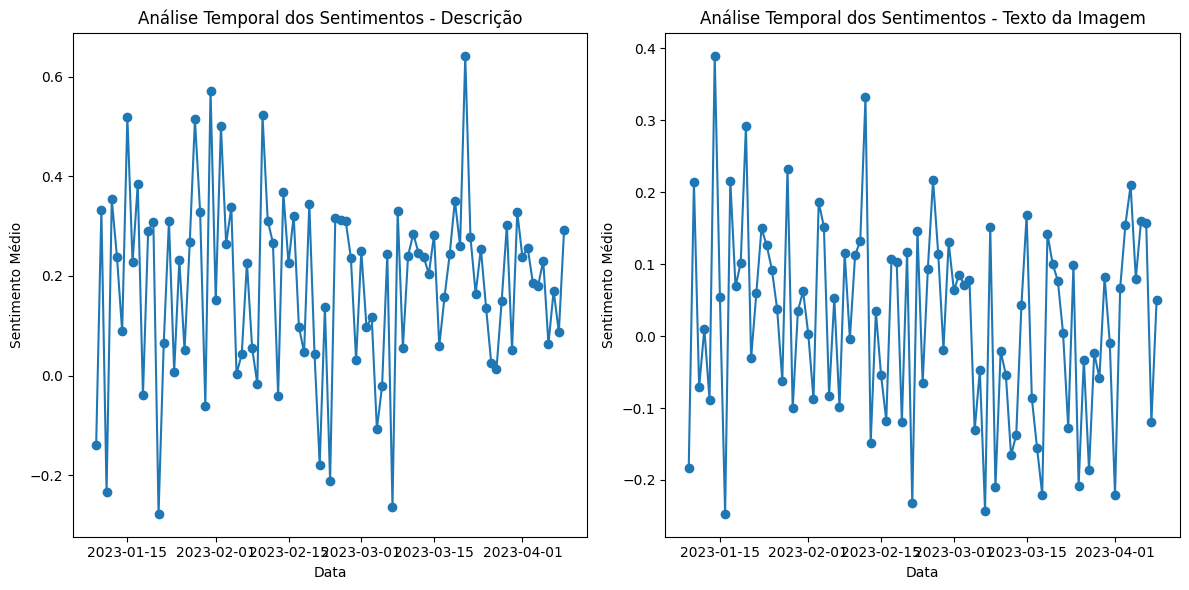

In [ ]:
plot_result_sentimentos_por_dia(df_publicas_after)

##### Resultados mensais

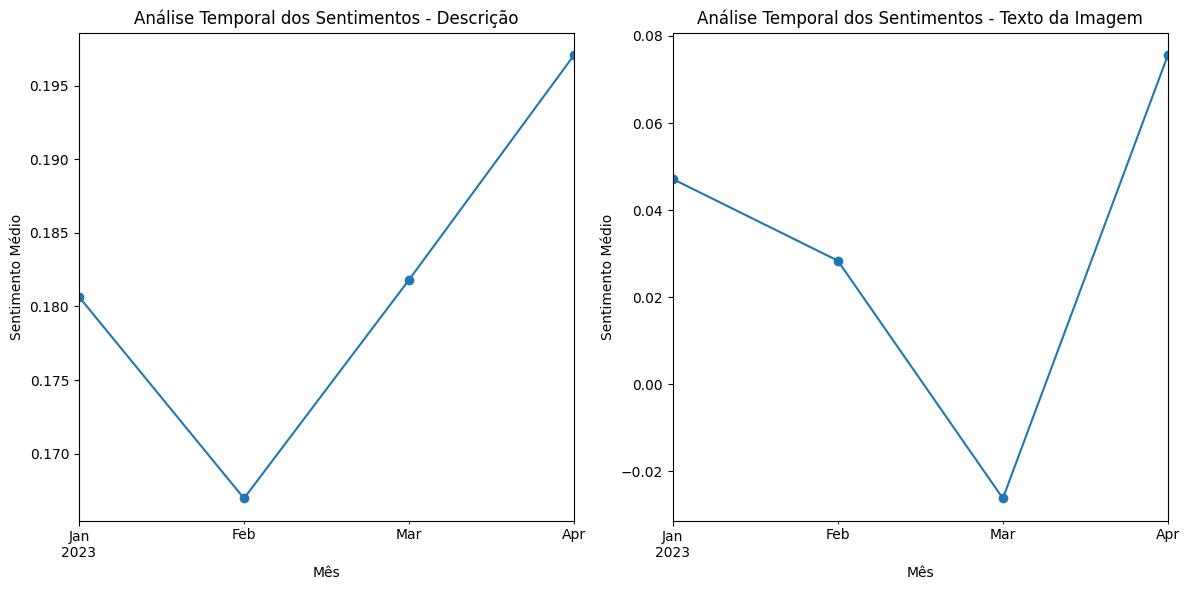

In [ ]:
plot_result_sentimentos_por_mes(df_publicas_after)


##### Resultado sentimento por pessoas

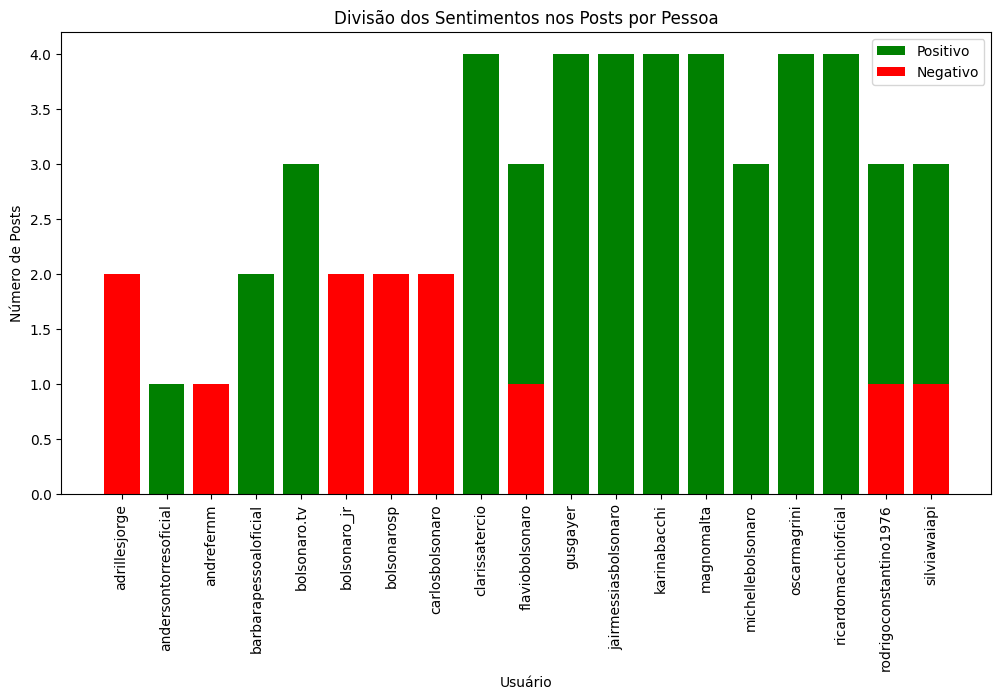

In [ ]:
sentimento_por_pessoa(df_publicas_after)

### Hashtags mais utilizadas

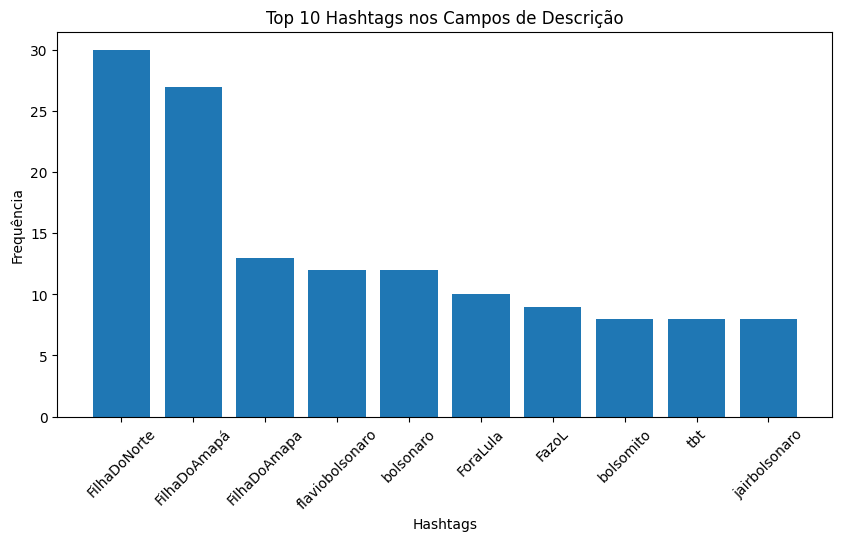

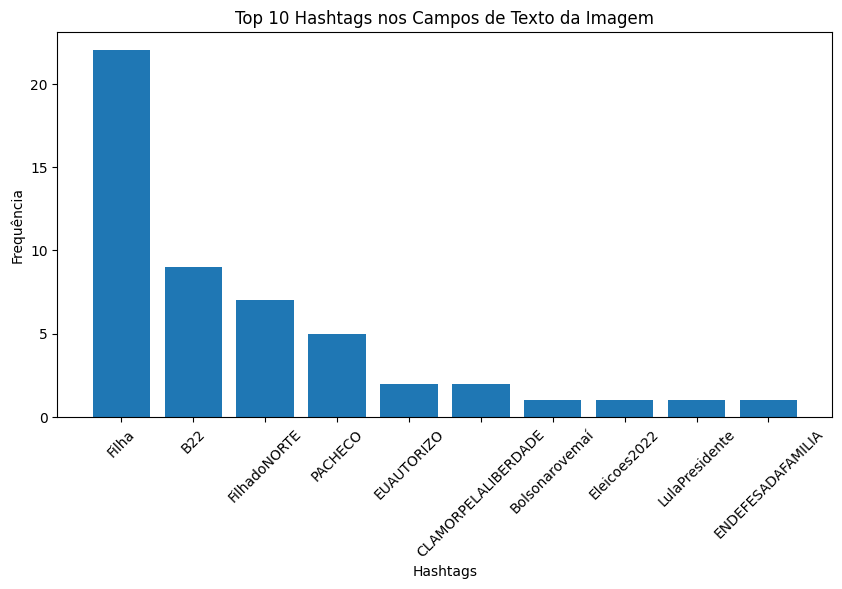

In [ ]:
plot_hashtags_top_10(df_publicas_after)

### Nuvem de palavras com as menções

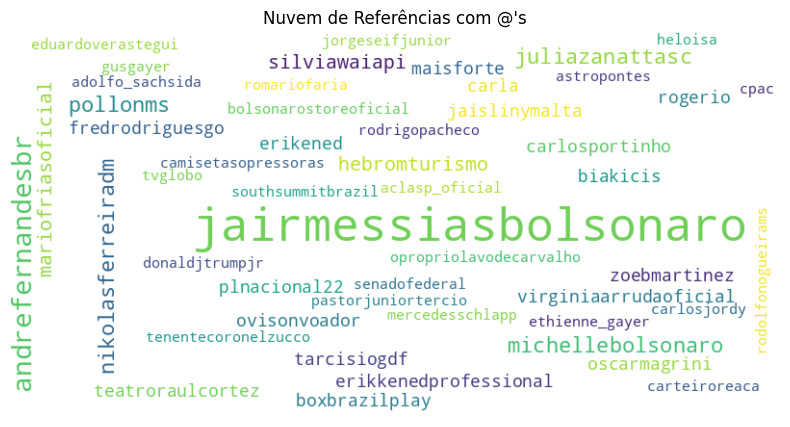

In [ ]:
wordcloud_mention(df_publicas_after)

### Análise de palavras

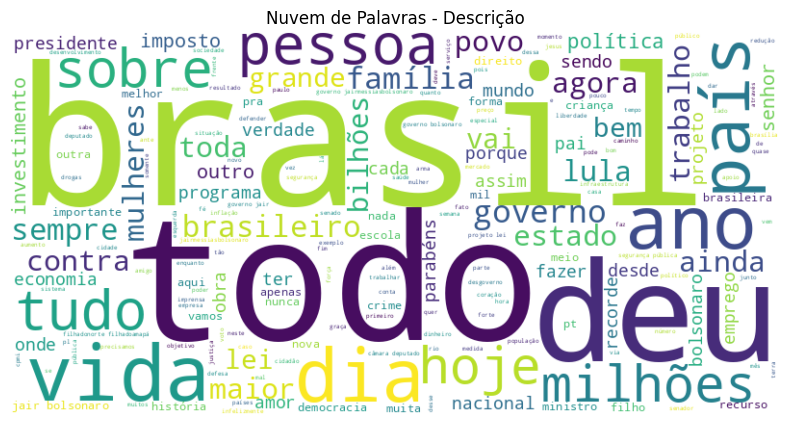

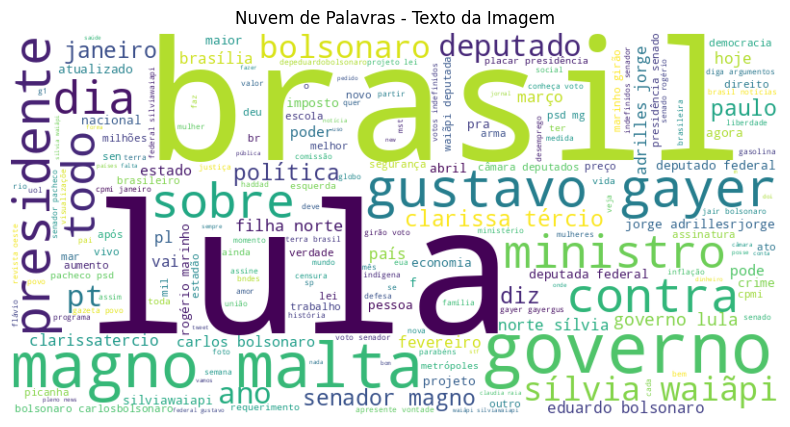

In [ ]:
analise_words(df_publicas_after)

### Análise de número de postagens

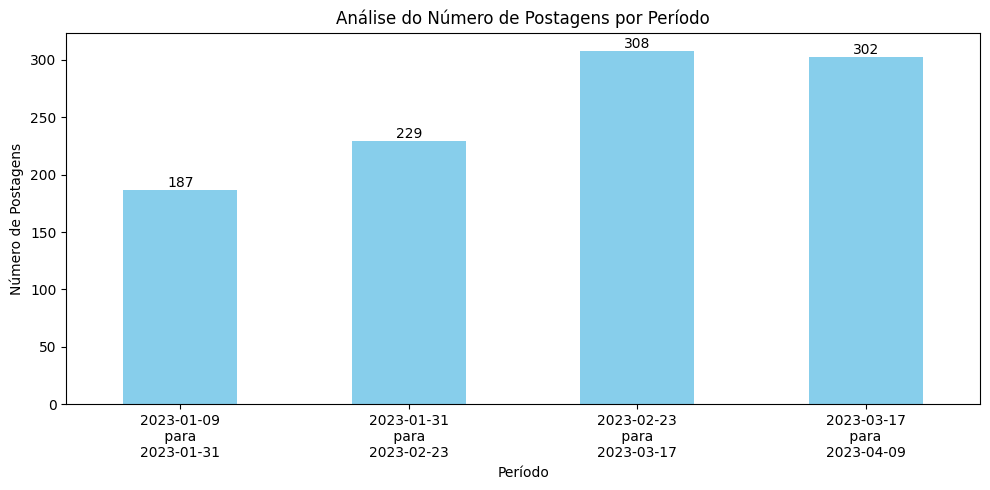

In [ ]:
analise_num_posts(df_publicas_after)

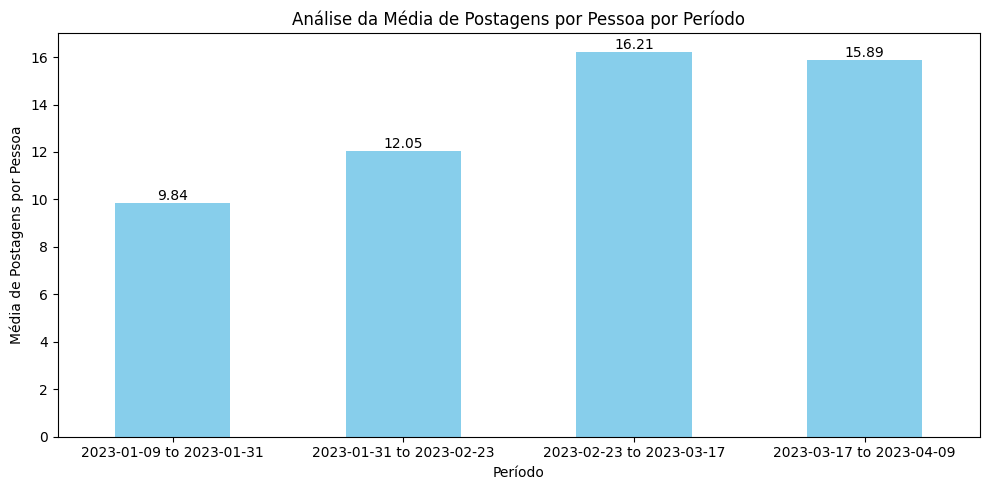

In [ ]:
analise_media_posts_per_person(df_publicas_after)

# Análise do dia 30/10 até dia 09/01 - Presentes no ato



In [ ]:
df_presentes_before_base = pd.read_csv('Report-Presentes-no-ataque-2023-06-20-19-31-24-EDT-Historical-2022-10-30--2023-01-09.csv')

In [ ]:
df = analise_sentimento_por_pessoa(df_presentes_before_base)

In [ ]:
from google.colab import files
# Salvar o DataFrame no arquivo CSV para importar no Gephi
df.to_csv('df_presentes_before.csv', index=False)


files.download('df_presentes_before.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Definição da base

In [ ]:
df_presentes_before = df
df_presentes_before['Post Created Date'] = pd.to_datetime(df_presentes_before['Post Created Date'])


### Análise de Sentimentos

#### Resultados

##### Resultados diários

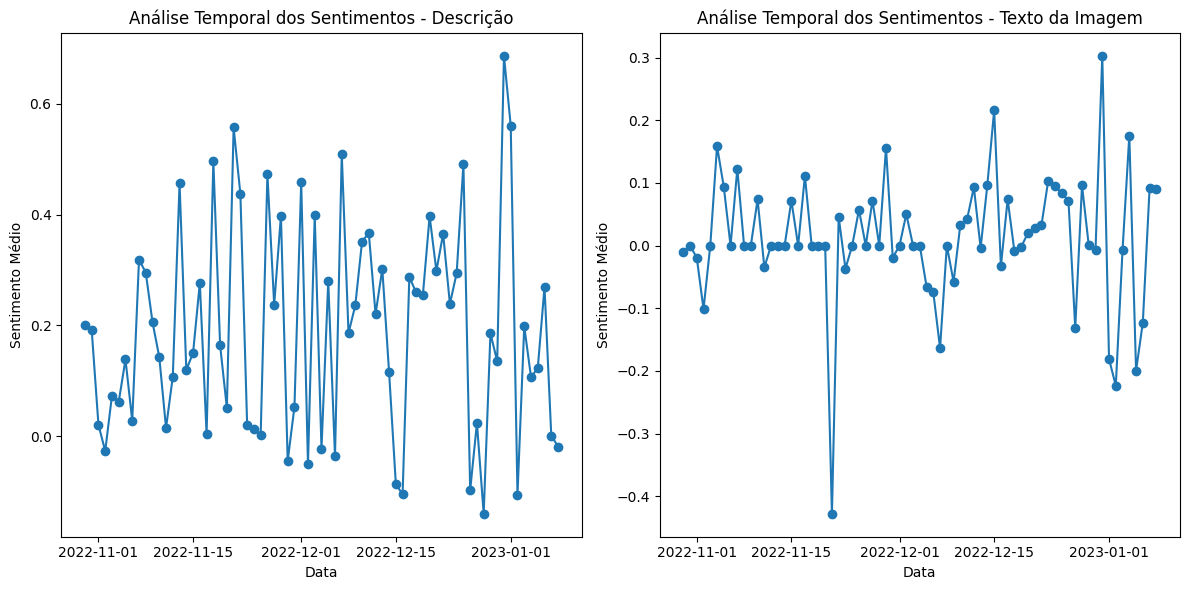

In [ ]:
plot_result_sentimentos_por_dia(df_presentes_before)

##### Resultados mensais

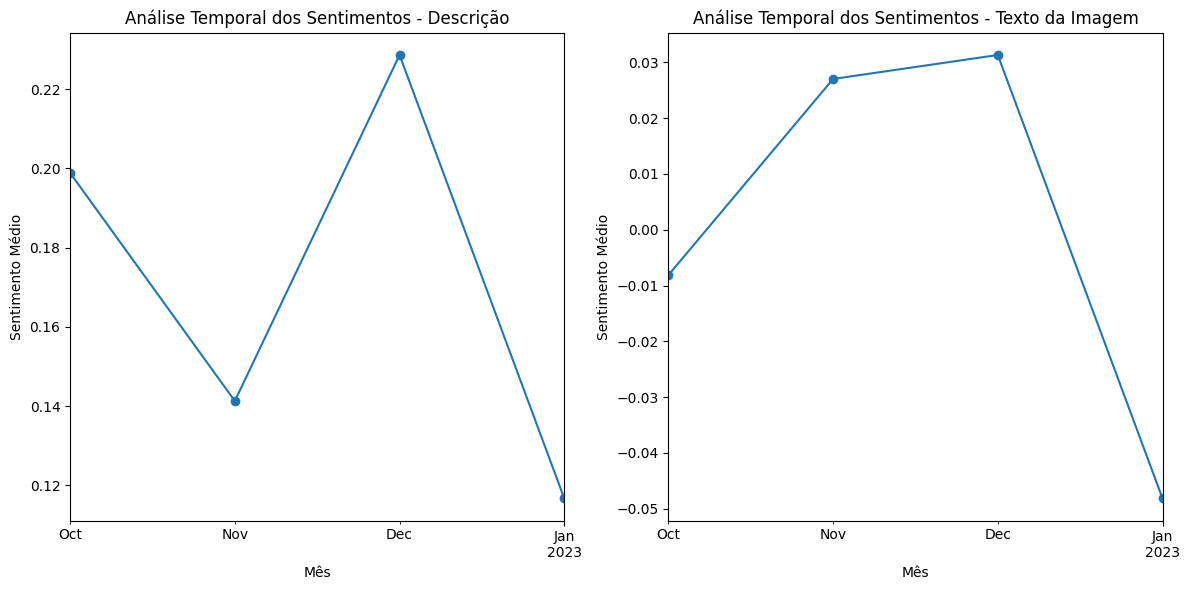

In [ ]:
plot_result_sentimentos_por_mes(df_presentes_before)


##### Resultado sentimento por pessoas

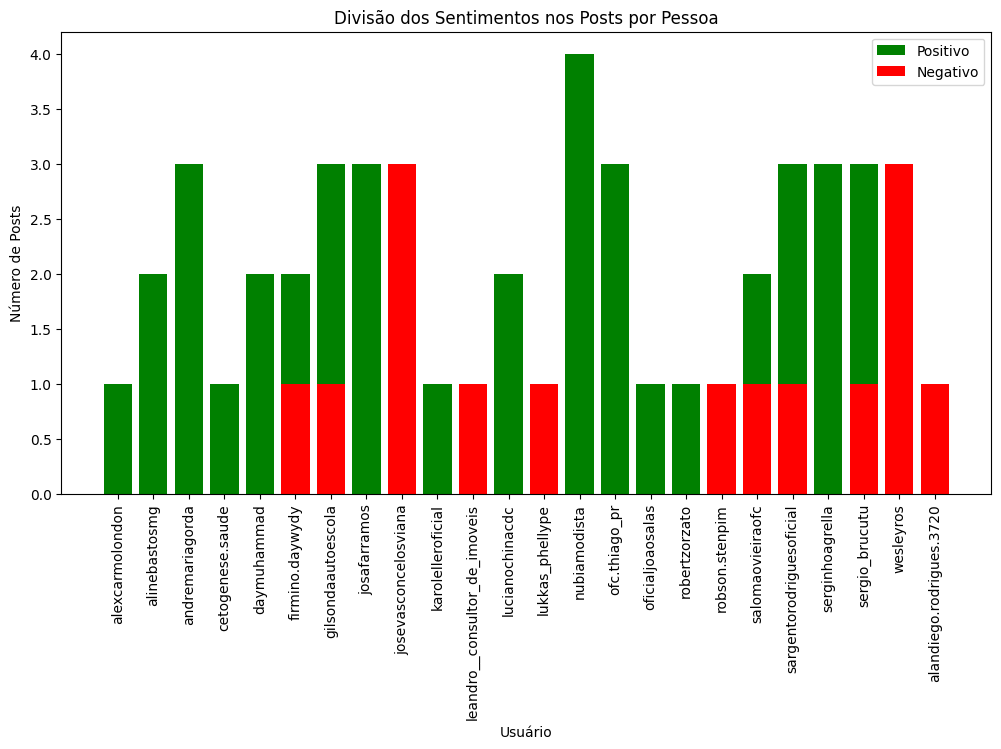

In [ ]:
sentimento_por_pessoa(df_presentes_before)

### Hashtags mais utilizadas

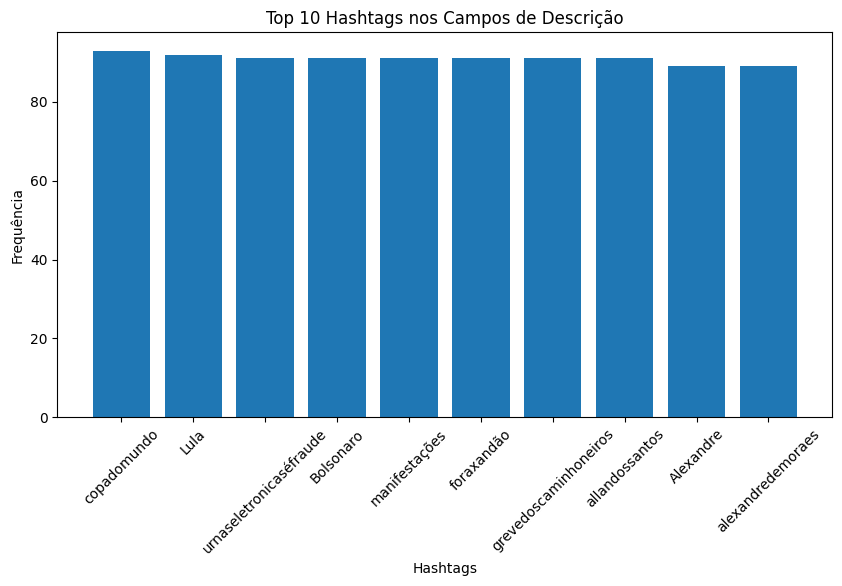

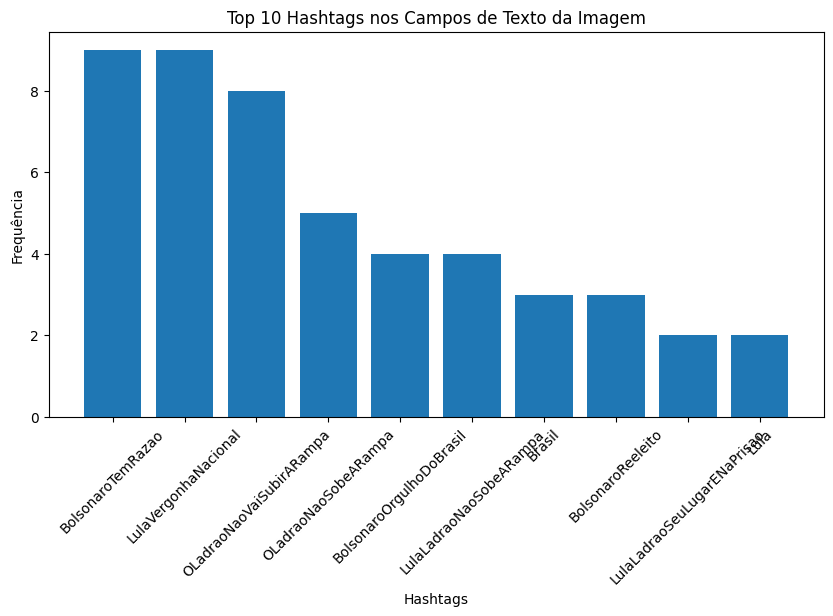

In [ ]:
plot_hashtags_top_10(df_presentes_before)

### Nuvem de palavras com as menções

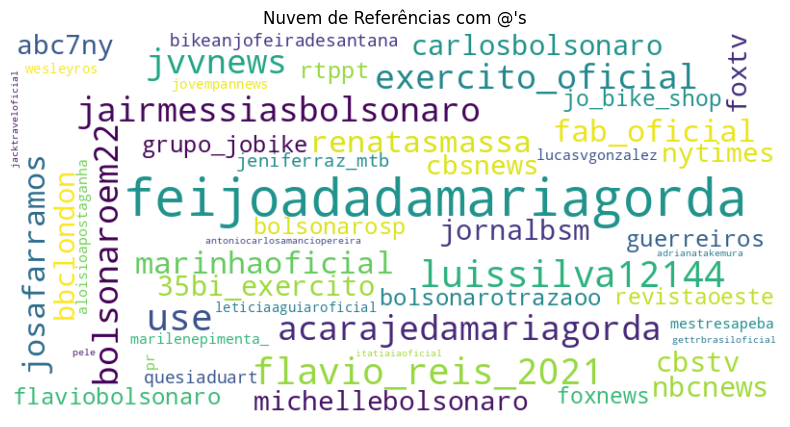

In [ ]:
wordcloud_mention(df_presentes_before)

### Análise de palavras

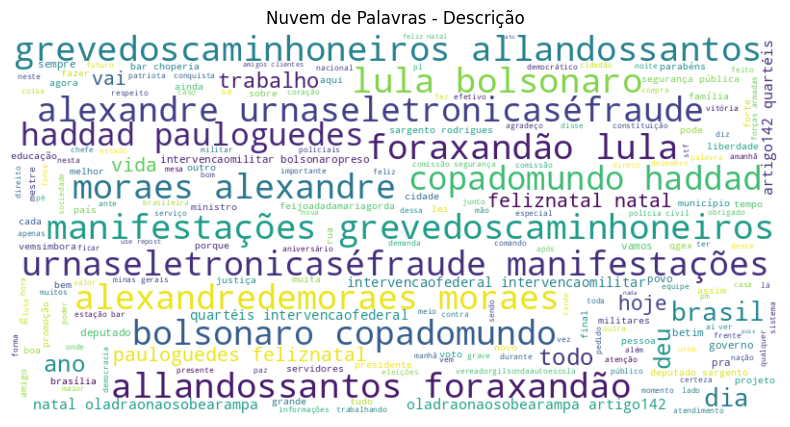

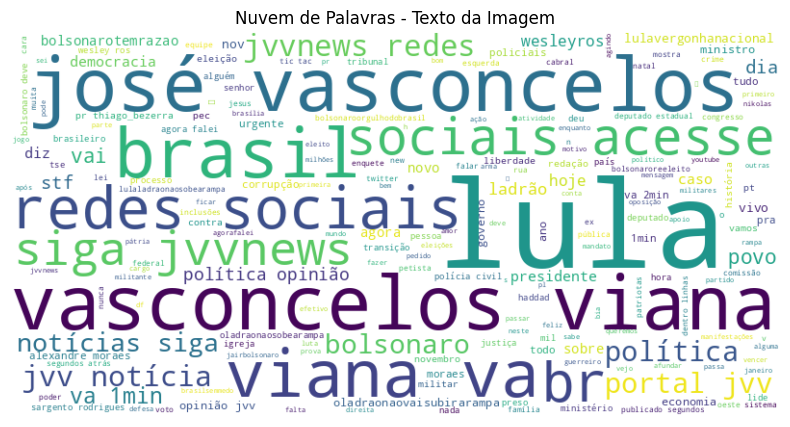

In [ ]:
analise_words(df_presentes_before)

### Análise de número de postagens

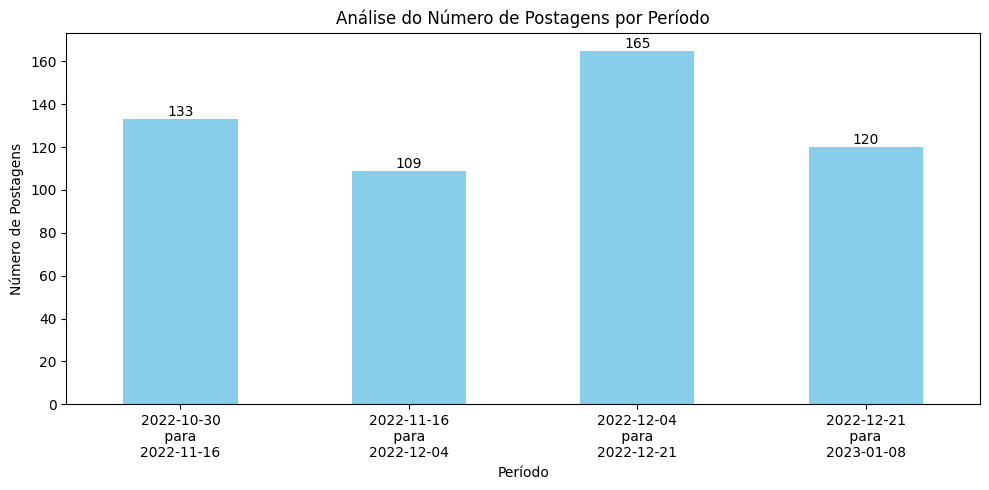

In [ ]:
analise_num_posts(df_presentes_before)

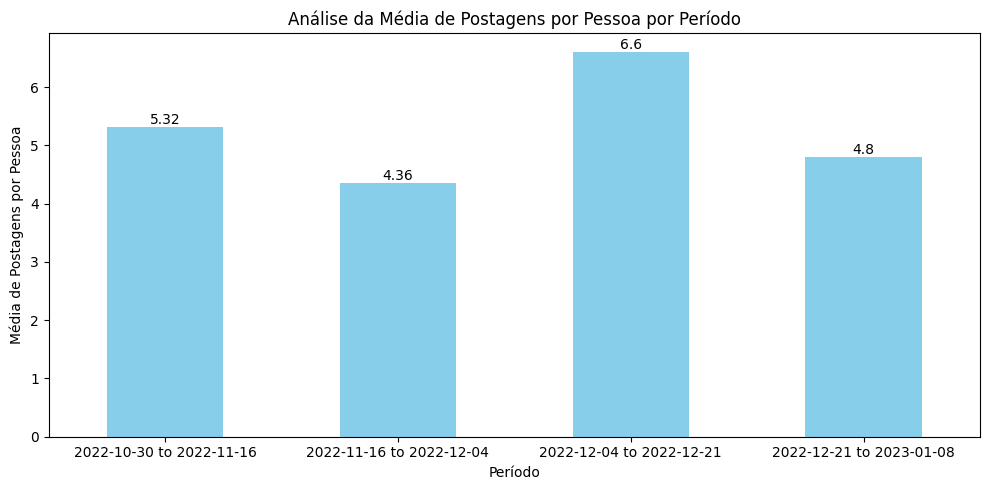

In [ ]:
analise_media_posts_per_person(df_presentes_before)

# Análise do dia 09/01 até dia 10/04 - Presentes no ato


### Definição da base

In [ ]:
df_presente_after = pd.read_csv('df_presente_after.csv')
df_presente_after['Post Created Date'] = pd.to_datetime(df_presente_after['Post Created Date'])


### Análise de Sentimentos

#### Resultados

##### Resultados diários

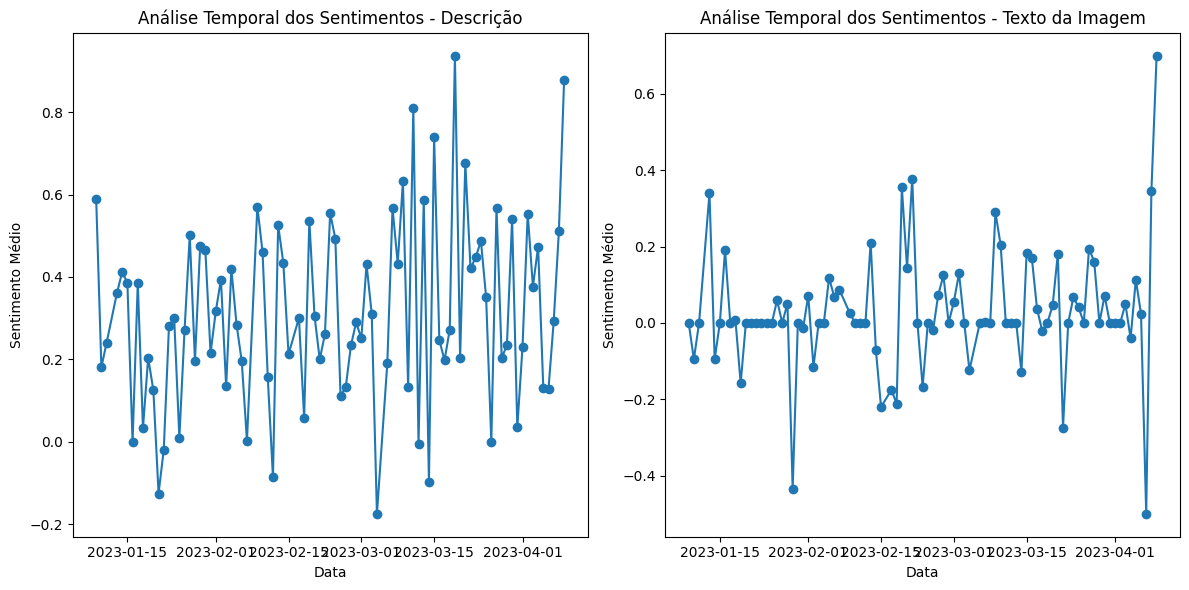

In [ ]:
plot_result_sentimentos_por_dia(df_presente_after)

##### Resultados mensais

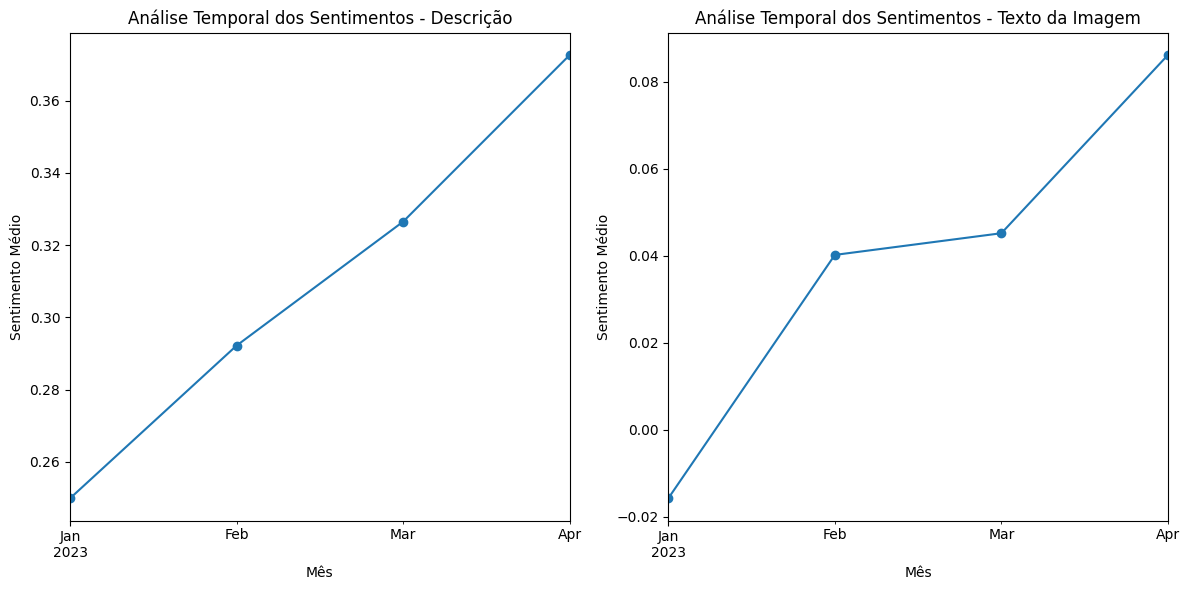

In [ ]:
plot_result_sentimentos_por_mes(df_presente_after)


##### Resultado sentimento por pessoas

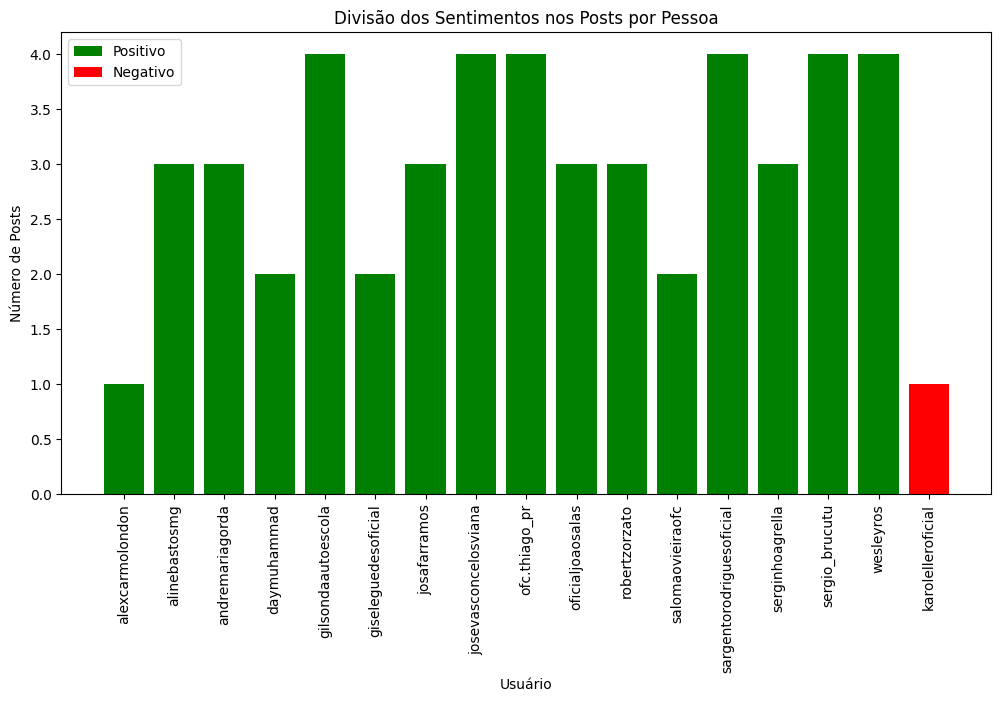

In [ ]:
sentimento_por_pessoa(df_presente_after)

### Hashtags mais utilizadas

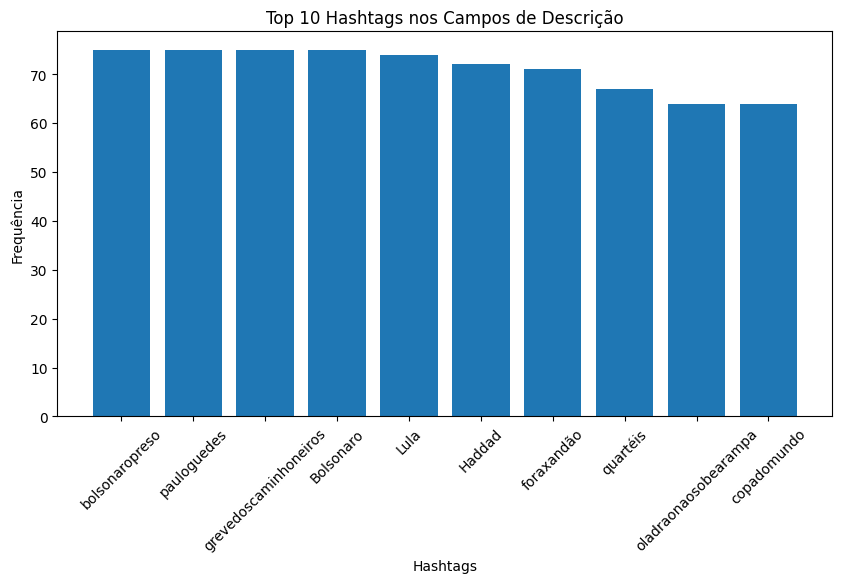

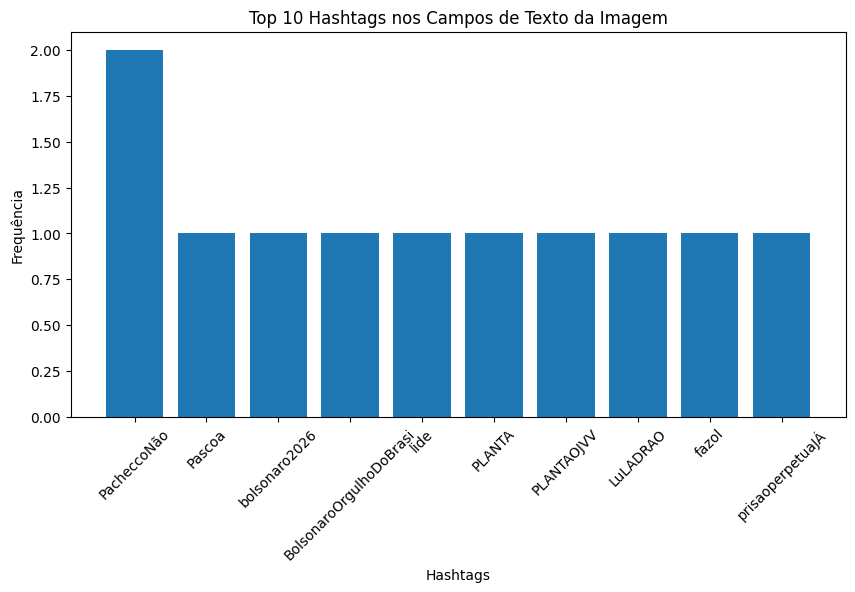

In [ ]:
plot_hashtags_top_10(df_presente_after)

### Nuvem de palavras com as menções

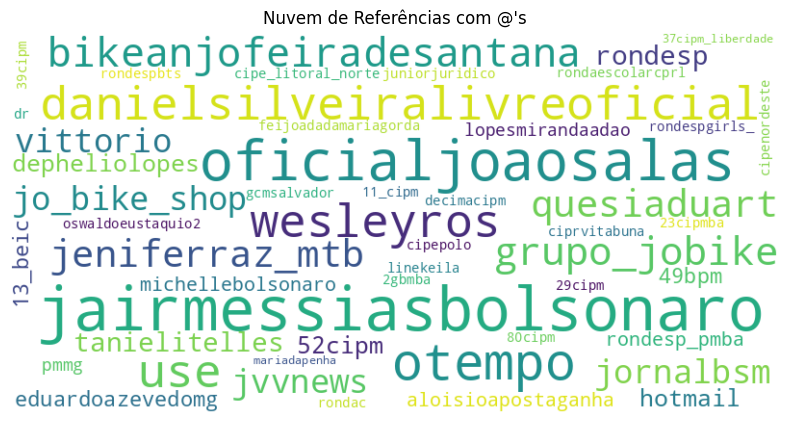

In [ ]:
wordcloud_mention(df_presente_after)

### Análise de palavras

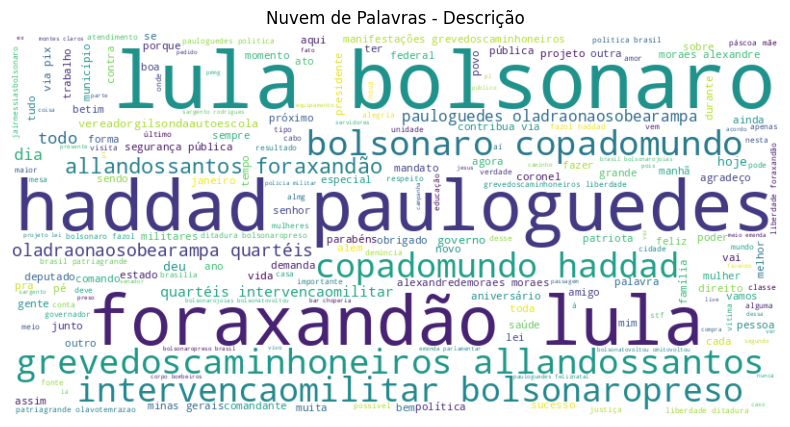

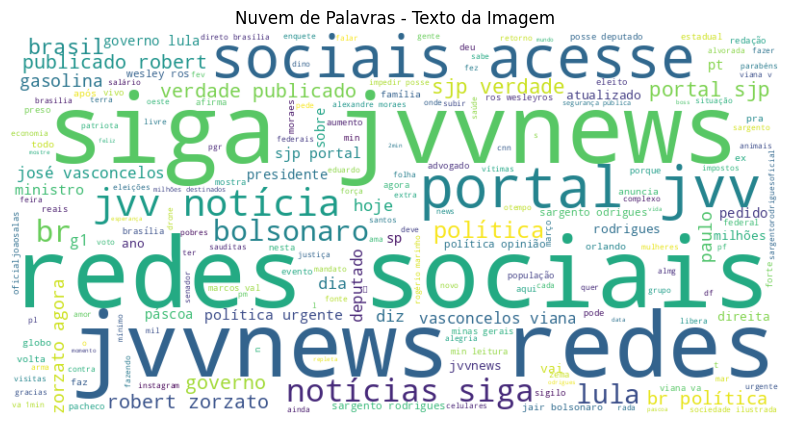

In [ ]:
analise_words(df_presente_after)

### Análise de número de postagens

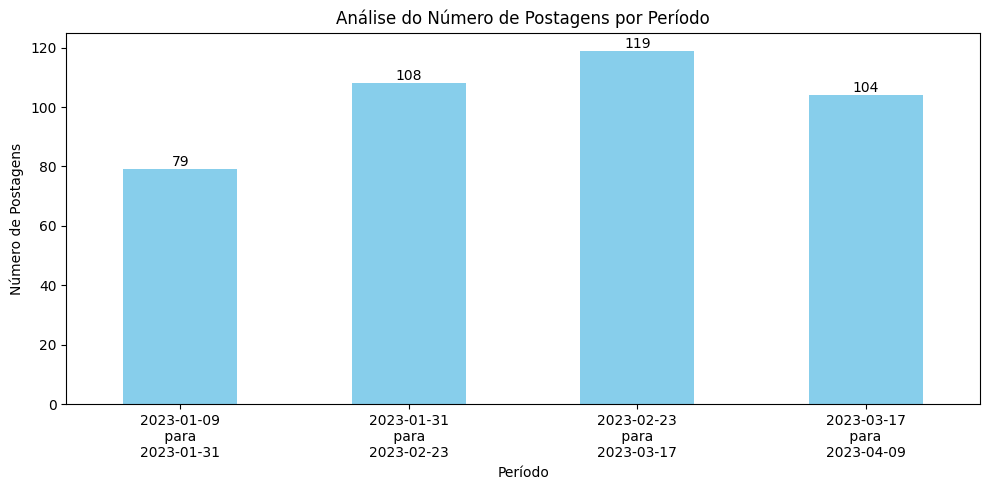

In [ ]:
analise_num_posts(df_presente_after)

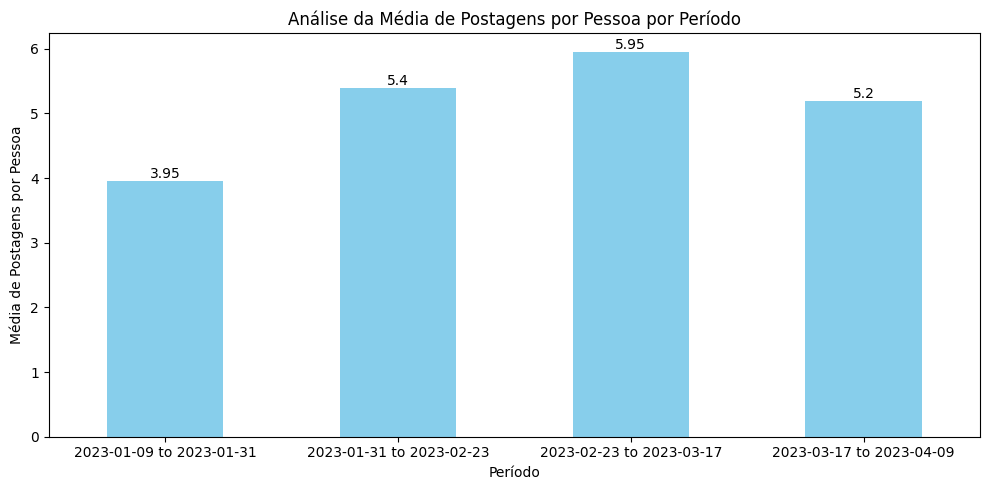

In [ ]:
analise_media_posts_per_person(df_presente_after)